In [4]:
import sys
sys.path.append("C:\\Users\\callu\\.mlrefined")

import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad
from autograd import value_and_grad

from mlrefined_libraries import math_optimization_library as optlib
static_plotter = optlib.static_plotter.Visualizer();

#make the matplots sizes much larger for better readings
plt.rcParams['figure.figsize'] = [15,10]


print('IMPORTED')

IMPORTED


In [5]:
#Taken from HW2
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = value_and_grad(g)
    
    if alpha == 'diminishing': #check for decreasing alpha
        alpha = 1/float(k)
    else:
        ()
    
    weight_history = [w]    
    cost_history = [g(w)]    
    for k in range(max_its):
        cost_eval,grad_eval = gradient(w)

        weight_history.append(w)
        cost_history.append(cost_eval)
        
        w = w - alpha*grad_eval 
        
    return weight_history,cost_history

# Exercise 1

In [6]:
# data input
datapath = "C:\\Users\\callu\\.mlrefined\\mlrefined_datasets\\superlearn_datasets\\"
csvname = datapath + 'breast_cancer_data.csv'
data1 = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data1[:-1,:]
y = data1[-1:,:] 

## 1.1) 
We now need to implement the cost functions for the softmax and perceptron. Finish the
implementation of the perceptron below:


In [7]:
# compute linear combination of input points
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# an implementation of the softmax cost
def softmax(w):    
    # compute the least squares cost
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(np.size(y))

# an implementation of the perceptron cost
def perceptron(w):
    #compute cost simalar to softmax
    zeros = np.zeros(y.shape, dtype=float)
    
    #rhs of the max function
    yxwFunc = -y * model(x , w)
    
    #using the summation of the max(0,y*xT*w) as seen in textbook
    cost = np.sum(np.maximum(zeros, yxwFunc))    
    
    return cost/float(np.size(y))
    

## 1.2) 
Use gradient descent (detailed on the previous assignments) with max its=1000, and a
random starting vector w = 0.1*np.random.randn(9,1) for both cost functions. For the perceptron cost function use alpha = 0.1 to determine the weight and cost history. For the
softmax use alpha = 1.0 to determine the weight and cost history.


In [ ]:
max_its = 1000
w = 0.1*np.random.randn(9,1)
alpha_soft = 1
alpha_percept = 0.1

softmax_w_history, softmax_cost_history = gradient_descent(softmax,alpha_soft,max_its,w)
perceptron_w_history, perceptron_cost_history = gradient_descent(perceptron,alpha_percept,max_its,w)

1.3) Use the weight history to track the number of misclassifications as a function of the iterations by implementing a function miscount(w,x,y) that counts the number of misclassifications for each w such that we can easily construct a misclassfication history using the command:

miscount history = [miscount(v,x,y) for v in weight history]

In [ ]:
### miscounts ###
def miscount(w,x,y):
    
    #finding the predicted y-value
    prediction = model(x , w)
    
    #determining if it is +1 or -1
    predicted_sign = np.sign(prediction)
    
    #obtaining the actual +1 or -1 value
    actual_sign = np.sign(y)
    
    #sum of the miscounts accourding to the specific w
    num_miscounts = np.sum(predicted_sign != actual_sign)
            
    return num_miscounts
    

In [ ]:
softmax_miscount_history = [miscount(v,x,y) for v in softmax_w_history]
perceptron_miscount_history = [miscount(v,x,y) for v in perceptron_w_history]

## 1.4)
Plot the cost function history and the misclassifcation history versus the number of iterations for the 2 cost functions together. 

Determine the minimum number of misclassifications for the 2 cost functions. 

For each of the cost functions modify miscount(w,x,y) to calculate only the misclassified malignant cases.

In [ ]:
num_its = np.arange(0,max_its+1,1)

plt.plot(num_its,softmax_cost_history)
plt.title('Softmax Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost History')
plt.show()

plt.plot(num_its,softmax_miscount_history)
plt.title('Softmax Miscount History')
plt.xlabel('Iterations')
plt.ylabel('Number of Miscounts')
plt.show()

plt.plot(num_its,perceptron_cost_history)
plt.title('Perceptron Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost History')
plt.show()

plt.plot(num_its,perceptron_miscount_history)
plt.title('Perceptron Miscount History')
plt.xlabel('Iterations')
plt.ylabel('Number of Miscounts')
plt.show()

In [ ]:
min_miscount_softmax = np.min(softmax_miscount_history)
print('\nminimum number of softmax miscounts:\t',min_miscount_softmax)
min_miscount_perceptron = np.min(perceptron_miscount_history)
print('\nminimum number of perceptrong miscounts:\t',min_miscount_perceptron)

In [ ]:
''' malignant miscounts 
    
    malignant = -1
    benign   = +1
    
    need to find misclassified malignant cases 
    thus need actual = -1
    miscount = +1
'''
def malignant_miscount(w,x,y):
    
    #finding the predicted y-value
    prediction = model(x , w)
    
    #determining if it is +1 or -1
    predicted_sign = np.sign(prediction)
    
    #obtaining the actual +1 or -1 value
    actual_sign = np.sign(y)
    
    #array of miscounts
    miscounts = np.array(predicted_sign != actual_sign)

    #array according to where malignant casses are
    benign = np.array([actual_sign == +1])
    
    num_miscounts = np.sum(miscounts)
    
    benign_miscounts = np.sum(miscounts*benign)
    
    malignant_miscounts = num_miscounts - benign_miscounts
    
    list_m = [num_miscounts,benign_miscounts,malignant_miscounts]

               
    return malignant_miscounts

In [ ]:
softmax_mal_miscount_history = [malignant_miscount(v,x,y) for v in softmax_w_history]
perceptron_mal_miscount_history = [malignant_miscount(v,x,y) for v in perceptron_w_history]

In [ ]:

plt.plot(num_its,softmax_mal_miscount_history)
plt.title('Softmax Malignant Miscount History')
plt.xlabel('Iterations')
plt.ylabel('Number of Malignant Miscounts')
plt.show()

plt.plot(num_its,perceptron_mal_miscount_history)
plt.title('Perceptron Malignant Miscount History')
plt.xlabel('Iterations')
plt.ylabel('Number of Malignant Miscounts')
plt.show()


## 1.5) 
We now want to check that we can get very similar results by directly doing a logistic
regression on the data with a cross entropy cost. In order to do that we create a new integer
vector yc which is equal to y except all the values of -1 in y have been replaced with a 0.
Furthermore, note that yc has only a single index. We can do that (clumsily) using:

We need yc to be integer because the cross entropy function (p. 134 in the book) has statements
like np.argwhere(yc==0). We can the use this slightly modified version of the cross entropy
function where we have added a L2 regularization:

Using α = 0.6 and again max its=1000 along with a similar random starting vector calculate
the weight and cost history using logistic regression with gradient descent. Use the weight
history to calculate the number of misclassifications. In this case you will need a modified
miscount function. How will you define a misclassification in this case ?



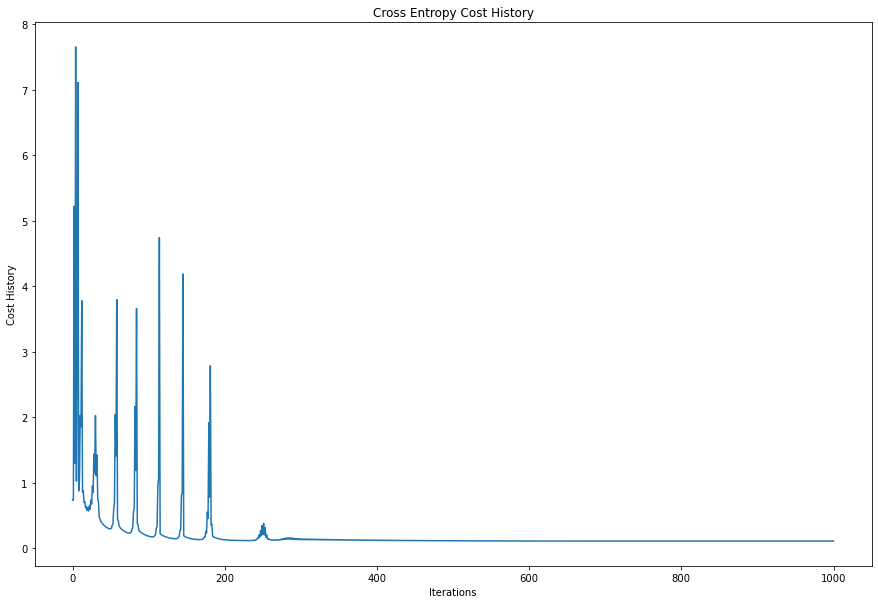

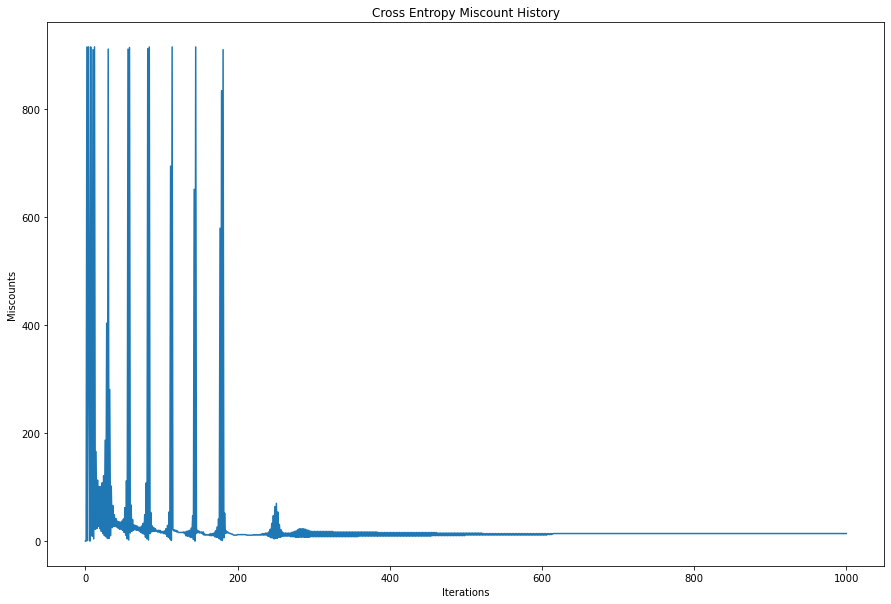

the minimum number of miscounts from the cross entropy function is:	 0


In [11]:
# data input
datapath = "C:\\Users\\callu\\.mlrefined\\mlrefined_datasets\\superlearn_datasets\\"
csvname = datapath + 'breast_cancer_data.csv'
data1 = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data1[:-1,:]
y = data1[-1:,:] 


a=np.argwhere(y>0.9)
b=np.argwhere(y<-0.9)
yc=np.arange(699)

yc[a]=1
yc[b]=0



# define sigmoid function
def sigmoid(t):
    return 1/(1 + np.exp(-t))

# the convex cross-entropy cost function
lam = 2*10**(-3)
def cross_entropy(w):
    # compute sigmoid of model
    a = sigmoid(model(x,w))
    
    # compute cost of label 0 points
    ind = np.argwhere(yc == 0)
    cost = -np.sum(np.log(1 - a[:,ind]))
    
    # add cost on label 1 points
    ind = np.argwhere(yc==1)
    cost -= np.sum(np.log(a[:,ind]))
    
    # add regularizer
    cost += lam*np.sum(w[1:]**2)
    
    # compute cross-entropy
    return cost/float(np.size(yc))



alpha = 0.6
max_its = 1000

#similar statring vector
w = 0.1*np.random.randn(9,1)

crossentropy_w_history, crossentropy_cost_history = gradient_descent(cross_entropy,alpha,max_its,w)


iterations = np.arange(0,max_its+1,1)

plt.plot(iterations,crossentropy_cost_history)
#plt.plot(iterations,crossentropy_cost_history)
plt.title('Cross Entropy Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost History')
plt.show()

def log_miscount(w,x,ys):
    
    prediction = model(x , w)
    
    #determining if prediction is +1 or -1
    predicted_sign = np.sign(prediction)
    
    #miscounts when actual label is 0
    ind = np.argwhere(ys == 0)
    num_miscounts = np.sum(predicted_sign[0][ind] != -1)
        
    #miscounts when actual label is 1
    ind = np.argwhere(ys == 1)
    num_miscounts = np.sum(predicted_sign[0][ind] != +1)
    
            
    return num_miscounts



log_miscount_history = [log_miscount(v,x,y) for v in crossentropy_w_history]


plt.plot(iterations,log_miscount_history)
plt.title('Cross Entropy Miscount History')
plt.xlabel('Iterations')
plt.ylabel('Miscounts')
plt.show()

print('the minimum number of miscounts from the cross entropy function is:\t',np.min(log_miscount_history));

# Exercise 2

In [ ]:
# standard normalization function - with nan checker / filler in-er
def standard_normalizer(x):    
    # compute the mean and standard deviation of the input
    x_means = np.nanmean(x,axis = 1)[:,np.newaxis]
    x_stds = np.nanstd(x,axis = 1)[:,np.newaxis]   

    # check to make sure that x_stds > small threshold, for those not
    # divide by 1 instead of original standard deviation
    ind = np.argwhere(x_stds < 10**(-2))
    if len(ind) > 0:
        ind = [v[0] for v in ind] # Just keep the row index
        adjust = np.zeros((x_stds.shape))
        adjust[ind] = 1.0
        x_stds += adjust

    # fill in any nan values with means 
    ind = np.argwhere(np.isnan(x) == True)
    for i in ind:
        x[i[0],i[1]] = x_means[i[0]]

    # create standard normalizer function
    normalizer = lambda data: (data - x_means)/x_stds

    # create inverse standard normalizer
    inverse_normalizer = lambda data: data*x_stds + x_means

    # return normalizer 
    return normalizer,inverse_normalizer

In [ ]:
# data input
csvname = datapath + 'spambase_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:] 
normalizer,inverse_normalizer = standard_normalizer(x)
x = normalizer(x)

## 2.1) 
Use gradient descent (detailed on the previous assignments) with max its=1000, and a random starting vector w = 0.1*np.random.randn(N+1,1) to classify the e-mails using the softmax and perceptron cost functions. For the perceptron cost function use alpha = 0.1 to determine the weight and cost history. For the softmax use alpha = 1. to determine the
weight and cost history. Use the weight histories to construct the miscount histories for the two cost functions and make plots of the cost function histories and miscount histories versus the iterations. Comment on your observations.


In [ ]:
alpha = 0.1
max_its = 1000
N = 57
w = 0.1*np.random.randn(N+1,1)

softmax_w_history, softmax_cost_history = gradient_descent(softmax,alpha_soft,max_its,w)
perceptron_w_history, perceptron_cost_history = gradient_descent(perceptron,alpha_percept,max_its,w)

softmax_miscount_history = [miscount(v,x,y) for v in softmax_w_history]
perceptron_miscount_history = [miscount(v,x,y) for v in perceptron_w_history]

num_its = np.arange(0,max_its+1,1)

plt.plot(num_its,softmax_cost_history)
plt.title('Softmax Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost History')
plt.show()

plt.plot(num_its,softmax_miscount_history)
plt.title('Softmax Miscount History')
plt.xlabel('Iterations')
plt.ylabel('Number of Miscounts')
plt.show()

plt.plot(num_its,perceptron_cost_history)
plt.title('Perceptron Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost History')
plt.show()

plt.plot(num_its,perceptron_miscount_history)
plt.title('Perceptron Miscount History')
plt.xlabel('Iterations')
plt.ylabel('Number of Miscounts')
plt.show()

## 2.2) 
For the two cost functions determine the smallest number of misclassifications achieved and convert it to an accuracy. Comment on your observations.


In [ ]:
softmax_min_miscount = np.min(softmax_miscount_history)
perceptron_min_miscount = np.min(perceptron_miscount_history)

def accuracy(miscounts,y):
    #fincing the number of labeled values
    P = np.size(y)
    
    #using accuracy formula
    accuracy = 1 - (miscounts/P)
    
    return accuracy
    
print('\nminimum number of softmax miscounts:\t',softmax_min_miscount)
softmax_accuracy = accuracy(softmax_min_miscount,y)
print('the accracy of the softmax function',softmax_accuracy)

print('\nminimum number of perceptrong miscounts:\t',perceptron_min_miscount)
perceptron_accuracy = accuracy(perceptron_min_miscount,y)
print('the accracy of the perceptron function',perceptron_accuracy)


## 2.3)
For the softmax results determine the best w and construct the confusion matrix.

In [ ]:
#confusion matrix

def best_wieght(miscount_history):
    
    #finding the indes where the miscount is the lowest
    index = np.where(miscount_history == np.min(miscount_history))
    
    return index[0][0]


def confusion_matrix(ws,xs,ys,index):
    
    prediction = model(xs , ws[index])
    
    predicted_label = np.sign(prediction)
    
    actual_label = np.sign(ys)
    
    #creating variables for the confusion matrix
    A = 0
    B = 0
    C = 0
    D = 0
    
    for i in range(len(ys.T)):
        #calculatinc A where the prediction is +1 & actual is +1
        if(predicted_label[-1][i] == +1 and actual_label[-1][i] == +1):
            A += 1
        
        #calculatinc B where the prediction is -1 & actual is +1
        elif(predicted_label[-1][i] == -1 and actual_label[-1][i] == +1):
            B += 1
        
        #calculatinc C where the prediction is +1 & actual is +1
        elif(predicted_label[-1][i] == +1 and actual_label[-1][i] == -1):
            C += 1
        
        #calculatinc D where the prediction is +1 & actual is -1
        else:
            D +=1
            
    confusion_matrix = np.array([[A,B],[C,D]])
    
    return confusion_matrix


    


In [ ]:
index_softmax = best_wieght(softmax_w_history)
print('The best sofmax wieght occurs at the index of wieght history of:\t', index_softmax)

softmax_confusion = confusion_matrix(softmax_w_history,x,y,index_softmax)
print('\nThe confusion maxtrix of the softmax function:\n',softmax_confusion)

In [ ]:
def balanced_accuracy(confusion_matrix):
    #extracting components from confusin matrix
    A = confusion_matrix[0][0]
    B = confusion_matrix[0][1]
    C = confusion_matrix[1][0]
    D = confusion_matrix[1][1]
    
    #calculating the balanced accuracy
    balanced_accuracy = (1/2*(A/(A+C)))+(1/2*(D/(B+D)))
    
    return balanced_accuracy

b_acc_soft = balanced_accuracy(softmax_confusion)

print('the balanced accuracy is:\t',b_acc_soft)




# Exercise 3

In [ ]:
# standard normalization function - with nan checker / filler in-er
def standard_normalizer(x):    
    # compute the mean and standard deviation of the input
    x_means = np.nanmean(x,axis = 1)[:,np.newaxis]
    x_stds = np.nanstd(x,axis = 1)[:,np.newaxis]   

    # check to make sure that x_stds > small threshold, for those not
    # divide by 1 instead of original standard deviation
    ind = np.argwhere(x_stds < 10**(-2))
    if len(ind) > 0:
        ind = [v[0] for v in ind] # Just keep the row index
        adjust = np.zeros((x_stds.shape))
        adjust[ind] = 1.0
        x_stds += adjust

    # fill in any nan values with means 
    ind = np.argwhere(np.isnan(x) == True)
    for i in ind:
        x[i[0],i[1]] = x_means[i[0]]

    # create standard normalizer function
    normalizer = lambda data: (data - x_means)/x_stds

    # create inverse standard normalizer
    inverse_normalizer = lambda data: data*x_stds + x_means

    # return normalizer 
    return normalizer,inverse_normalizer

## 3.1) 
As in the previous exercise it is difficult to compare the importance of the different features
and it therefore makes sense to standard normalize. Perform a standard normalization of the
input data.


In [ ]:
# load in dataset
csvname = datapath + 'credit_dataset.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]

normalizer,inverse_normalizer = standard_normalizer(x)
x = normalizer(x)

## 3.2) 
Use the perceptron cost function to fit a model using gradient descent with max its=1000,
and a random starting vector w = 0.1*np.random.randn(N+1,1) and alpha = 0.1. Plot the
cost function history along with the misclassification history versus the number of iterations.
Can you achieve the 75% accuracy mentioned in the book ?

In [ ]:
max_its = 1000
N=20
w = 0.1*np.random.randn(N+1,1)
alpha = 0.1

perceptron_w_history, perceptron_cost_history = gradient_descent(perceptron,alpha,max_its,w)

perceptron_miscount_history = [miscount(v,x,y) for v in perceptron_w_history]

num_its = np.arange(0,max_its+1,1)

plt.plot(num_its,perceptron_cost_history)
plt.title('Perceptron Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost History')
plt.show()

plt.plot(num_its,perceptron_miscount_history)
plt.title('Perceptron Miscount History')
plt.xlabel('Iterations')
plt.ylabel('Cost History')
plt.show()


In [ ]:
min_norm_p_miscount = np.min(perceptron_miscount_history)

norm_p_accuracy = accuracy(min_norm_p_miscount,y)

print('the minimum miscounts of the normalized perceptron is:\t',min_norm_p_miscount,
      '\n\nthe normalized perceptron accuaracy is:\t',norm_p_accuracy)

## 3.3) 
Determine the confusion matrix for the optimal weights determined with the perceptron
cost.

In [ ]:
index_p = best_wieght(perceptron_miscount_history)
perceptron_confusion = confusion_matrix(perceptron_w_history,x,y,index_p)

print('the optimal weight occurs at wieght index:\t',index_p,
      '\n\nthe confusion matrix with the optimal wieght is:\n',perceptron_confusion)

# Exercise 4

In [13]:
# compute C linear combinations of input point, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

lam = 10**-5  # our regularization paramter 
def multiclass_perceptron(w):        
    # pre-compute predictions on all points
    all_evals = model(x,w)
    
    # compute maximum across data points
    a = np.max(all_evals,axis = 0)    

    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)
    
    # add regularizer
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    
    # return average
    return cost/float(np.size(y))

In [14]:
# load in dataset
data = np.loadtxt(datapath + '3class_data.csv',delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

## 4.1) 
Use the multi-class perceptron cost function to fit a model using gradient descent with
max its=1000, and a random starting vector w = 0.1*np.random.randn(3,3) and alpha =
0.1. Plot the cost function history versus the number of iterations. Can you achieve as good
a classification as shown in Fig. 7.9 in the book ?


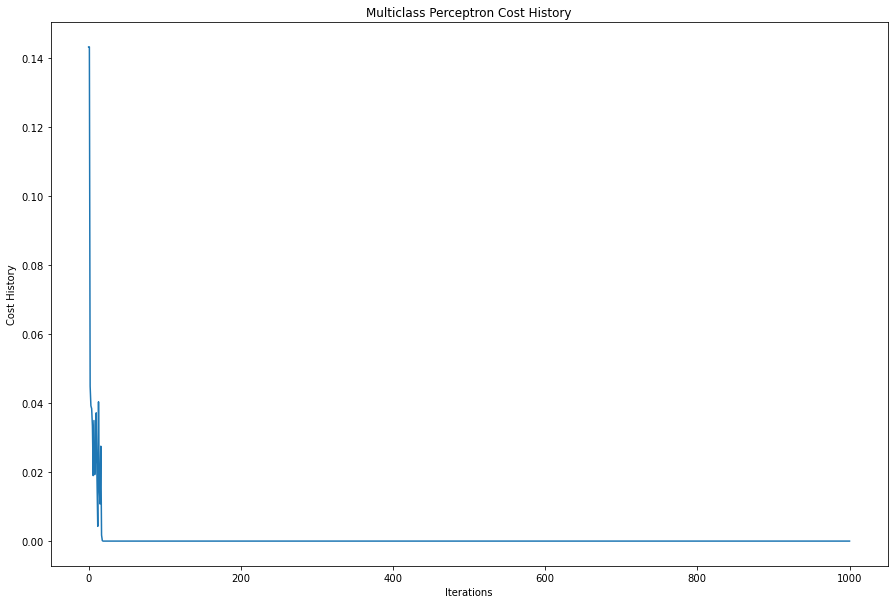

In [17]:
max_its = 1000
w =  0.1*np.random.randn(3,3) 
alpha = 0.1

multperc_w_history , multperc_cost_history = gradient_descent(multiclass_perceptron,alpha,max_its,w)

num_its = np.arange(0,max_its+1,1)

plt.plot(num_its,multperc_cost_history)
plt.title('Multiclass Perceptron Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost History')
plt.show()


## 4.2)
Plot the data in the plane along with the decision boundaries. You should get something
similar but not idetical to what is in the book byt Watt et al.


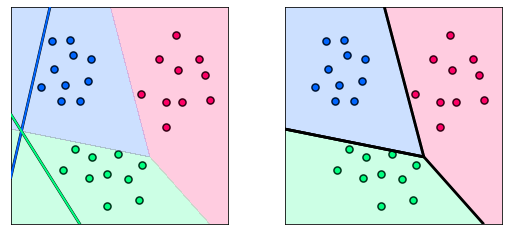

In [18]:
from mlrefined_libraries import superlearn_library as superlearn
from mlrefined_libraries import math_optimization_library as optlib
optimizers = optlib.optimizers
classif_plotter = superlearn.multi_lin_classification_demo
cost_lib = superlearn.cost_functions
normalizers = superlearn.normalizers 


max_its = 1000
w =  0.1*np.random.randn(3,3) 
alpha = 0.1

multperc_w_history , multperc_cost_history = gradient_descent(multiclass_perceptron,alpha,max_its,w)

num_its = np.arange(0,max_its+1,1)

#demo = superlearn.ova_illustrator.Visualizer(data)
#demo.show_dataset()
demo2 = superlearn.multiclass_illustrator.Visualizer(data)
demo2.show_complete_coloring(multperc_w_history, cost = multperc_cost_history)